In [1]:
# Wine 데이터셋 로그 

import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu'
                      '/ml/machine-learning-databases/wine/wine.data', header=None)

In [2]:
# Wine 데이터셋을 7:3 비율로 훈련셋과 테스트셋으로 나눈다.

from sklearn.model_selection import train_test_split

# 인덱스 1에서 인덱스 13까지 특성을 넘파일 배열로 변환하여 x에 할당
x = df_wine.iloc[:, 1:].values
# 첫번째 열의 클래스 레이블을 y에 할당
y = df_wine.iloc[:, 0].values
# train_test_split 함수를 사용하여 x와 y를 랜덤하게 훈련셋과 테스트셋으로 분할
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.3,      # 와인 샘플의 30%가 x_test와 y_test에 할당 
    random_state=0, 
    stratify=y          # y로 하면 훈련셋과 테스트셋에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지됨
)

In [3]:
# 특성을 표준화 한다.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

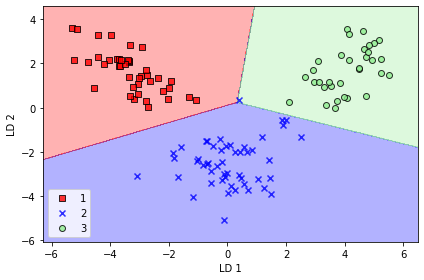

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from common import utils
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train_std, y_train)

lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(x_train_lda, y_train)

utils.plot_decision_regions(x_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

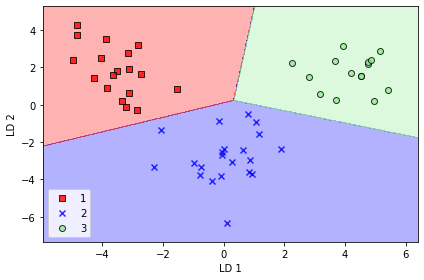

In [7]:
## 테스트셋으로 모델을 검증한다. 

x_test_lda = lda.transform(x_test_std)

utils.plot_decision_regions(x_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()